In [44]:
x, sr = librosa.load("M1.mp3")
S = librosa.stft(x)


In [45]:
X, X_phase = librosa.magphase(S)
n_components = 6
W, H = librosa.decompose.decompose(X, n_components=n_components, sort=True)

In [47]:
print(W.shape)
print(H.shape)

(1025, 6)
(6, 7171)


In [6]:
from pydub import AudioSegment
import numpy as np

# Load stereo audio file
audio = AudioSegment.from_file("M1.mp3")

# Ensure the audio is stereo
if audio.channels != 2:
    raise ValueError("This method only works on stereo audio files.")

# Split stereo track into left and right channels
left_channel = audio.split_to_mono()[0]
right_channel = audio.split_to_mono()[1]

# Invert the phase of the right channel (center panned vocals will cancel out)
right_channel_inverted = right_channel.invert_phase()


# Merge the inverted right channel back with the left channel
vocal_removed = AudioSegment.from_mono_audiosegments(left_channel, right_channel_inverted)

# Export the processed audio file
vocal_removed.export("vocal_removed_output.mp3", format="mp3")

print("Vocal removal complete. Output saved as 'vocal_removed_output.mp3'.")


Vocal removal complete. Output saved as 'vocal_removed_output.mp3'.


In [3]:
import librosa
import sounddevice as sd
import numpy as np
import os
import soundfile as sf  # Importing soundfile to save audio

# Load the audio file (replace 'your_audio_file.m4a' with your actual file path)
audio_file = 'M1.mp3'
y, sr = librosa.load(audio_file, sr=None)

# Get the total duration of the audio in seconds
total_duration = librosa.get_duration(y=y, sr=sr)
print(f"Total duration of the audio: {total_duration:.2f} seconds")

# Calculate the duration of each part
num_parts = 10
part_duration = total_duration / num_parts
print(f"Duration of each part: {part_duration:.2f} seconds")

# Split the audio into 10 parts
segments = []
for i in range(num_parts):
    start_time = i * part_duration
    end_time = start_time + part_duration
    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)
    
    # Ensure the last segment captures any remaining samples
    if i == num_parts - 1:
        end_sample = len(y)
    
    segments.append(y[start_sample:end_sample])

# Function to play each segment
def play_segments(segments, sr):
    for i, segment in enumerate(segments):
        print(f"Playing segment {i + 1}...")
        sd.play(segment, sr)
        sd.wait()  # Wait until the segment finishes playing

# Optionally, play the segments
play_segments(segments, sr)

# Optionally, save each segment to a file
output_dir = 'output_segments'
os.makedirs(output_dir, exist_ok=True)

for i, segment in enumerate(segments):
    output_file = os.path.join(output_dir, f'segment_{i + 1}.wav')
    sf.write(output_file, segment, sr)  # Use soundfile to write the wav file
    print(f"Saved segment {i + 1} to {output_file}")


Total duration of the audio: 166.49 seconds
Duration of each part: 16.65 seconds
Playing segment 1...
Playing segment 2...
Playing segment 3...
Playing segment 4...
Playing segment 5...
Playing segment 6...
Playing segment 7...
Playing segment 8...
Playing segment 9...
Playing segment 10...
Saved segment 1 to output_segments\segment_1.wav
Saved segment 2 to output_segments\segment_2.wav
Saved segment 3 to output_segments\segment_3.wav
Saved segment 4 to output_segments\segment_4.wav
Saved segment 5 to output_segments\segment_5.wav
Saved segment 6 to output_segments\segment_6.wav
Saved segment 7 to output_segments\segment_7.wav
Saved segment 8 to output_segments\segment_8.wav
Saved segment 9 to output_segments\segment_9.wav
Saved segment 10 to output_segments\segment_10.wav


In [34]:
import librosa
import soundfile as sf
import os

# Load the audio file (replace 'your_audio_file.m4a' with your actual file path)
audio_file = "output_vocals.wav"
y, sr = librosa.load(audio_file, sr=None)

# Define the start and end times (in seconds)
start_time = 15
end_time = 15.4

# Convert times to sample indices
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Ensure the end sample doesn't exceed the length of the audio
end_sample = min(end_sample, len(y))

# Cut the audio segment
audio_segment = y[start_sample:end_sample]

# Save the cut audio segment
output_file = 'cut_audio_0_to_10s.wav'
sf.write(output_file, audio_segment, sr)

print(f"Saved the cut audio segment to {output_file}")
print("Playing extracted vocals...")
ipd.display(ipd.Audio( 'cut_audio_0_to_10s.wav'))

Saved the cut audio segment to cut_audio_0_to_10s.wav
Playing extracted vocals...


Loading original music...
Applying bandpass filter to isolate vocals...
Playing original music...


Playing extracted vocals...


Plotting waveforms...


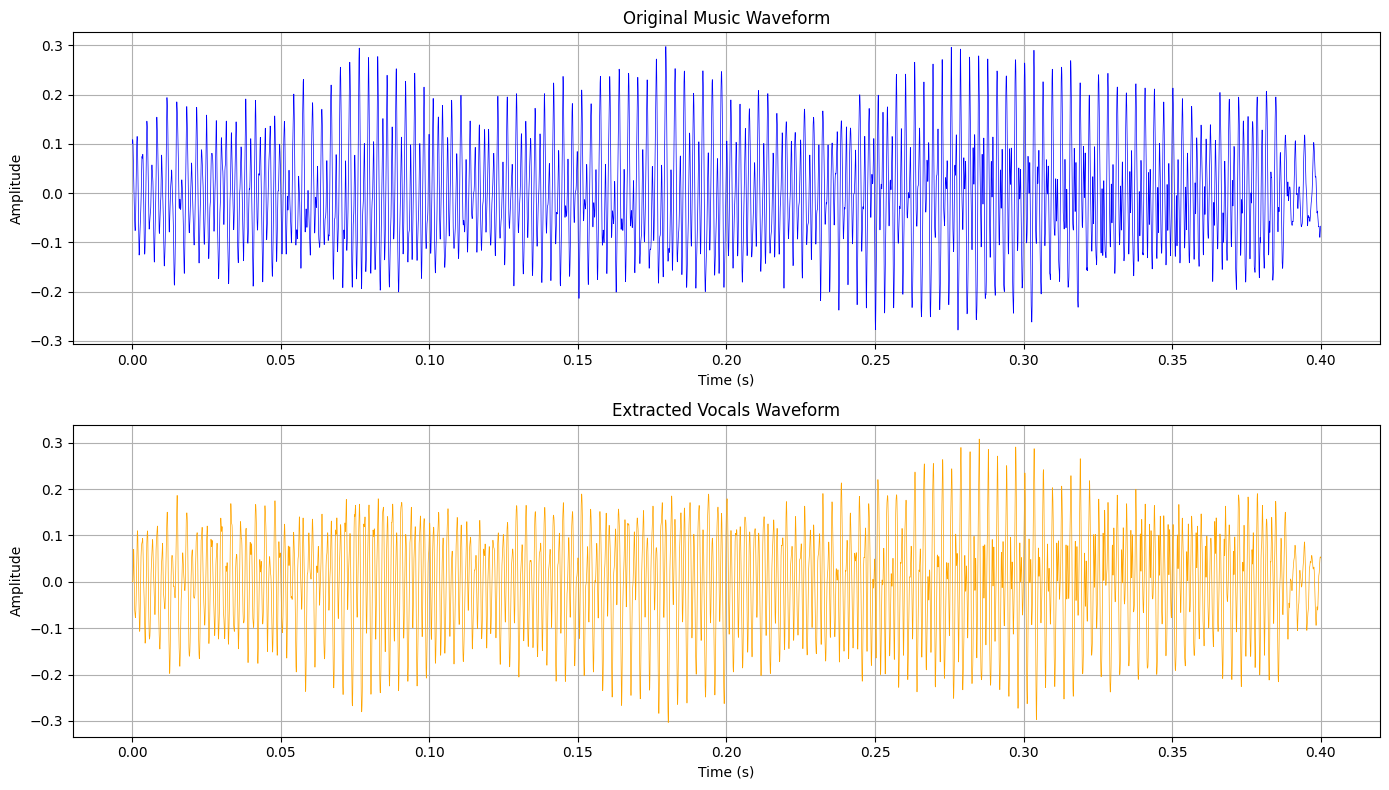

Process completed successfully.


In [35]:
def plot_waveform(y, sr, title, color='blue', max_points=500000):
    """
    Plots the waveform of an audio signal.

    Parameters:
    - y: np.ndarray, audio time series
    - sr: int, sampling rate
    - title: str, title of the plot
    - color: str, color of the waveform
    - max_points: int, maximum number of points to plot to avoid MemoryError
    """
    total_points = len(y)
    if total_points > max_points:
        # Calculate the step size for downsampling
        step = total_points // max_points
        y_plot = y[::step]
        x_plot = np.linspace(0, len(y) / sr, len(y_plot))
    else:
        y_plot = y
        x_plot = np.linspace(0, len(y) / sr, len(y_plot))
    
    plt.plot(x_plot, y_plot, color=color, linewidth=0.5)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

# Load the original music file
original_music_path = 'cut_audio_0_to_10s.wav'  # Replace with your file path
print("Loading original music...")
y_music, sr_music = librosa.load(original_music_path, sr=None)
y_music = y_music.astype(np.float32)  # Ensure float32 for memory efficiency

# Bandpass filter to isolate vocals
lowcut = 100.0  # Lower frequency bound for vocals
highcut = 3000.0  # Upper frequency bound for vocals
print("Applying bandpass filter to isolate vocals...")
sos = signal.butter(10, [lowcut, highcut], btype='band', fs=sr_music, output='sos')
y_vocals = signal.sosfilt(sos, y_music)
y_vocals = y_vocals.astype(np.float32)  # Ensure float32 for memory efficiency


# Play the original music and extracted vocals
print("Playing original music...")
ipd.display(ipd.Audio(original_music_path))

print("Playing extracted vocals...")
ipd.display(ipd.Audio(vocals_path))

# Plotting the waveforms
print("Plotting waveforms...")
plt.figure(figsize=(14, 8))

# Plot original music waveform
plt.subplot(2, 1, 1)
plot_waveform(y_music, sr_music, "Original Music Waveform", color='blue')
        
# Plot extracted vocals waveform
plt.subplot(2, 1, 2)
plot_waveform(y_vocals, sr_music, "Extracted Vocals Waveform", color='orange')

plt.tight_layout()
plt.show()

print("Process completed successfully.")


In [42]:
len(y_music)

17640

In [41]:
sr_music

44100

In [36]:
import librosa
import numpy as np
import soundfile as sf

# Load the audio file
audio_file = 'cut_audio_0_to_10s.wav'  # Replace with your audio file
y, sr = librosa.load(audio_file, sr=None)

# Perform NMF
D = librosa.stft(y)
D_magnitude, D_phase = np.abs(D), np.angle(D)

# Number of sources you want to extract
n_sources = 2  
W, H = librosa.decompose.decompose(D_magnitude, n_components=n_sources)

# Reconstruct the separated sources
source_1 = librosa.istft(W[:, 0][:, np.newaxis] * D_phase)
source_2 = librosa.istft(W[:, 1][:, np.newaxis] * D_phase)

# Save the separated sources
sf.write('source_1.wav', source_1, sr)  # First source
sf.write('source_2.wav', source_2, sr)  # Second source


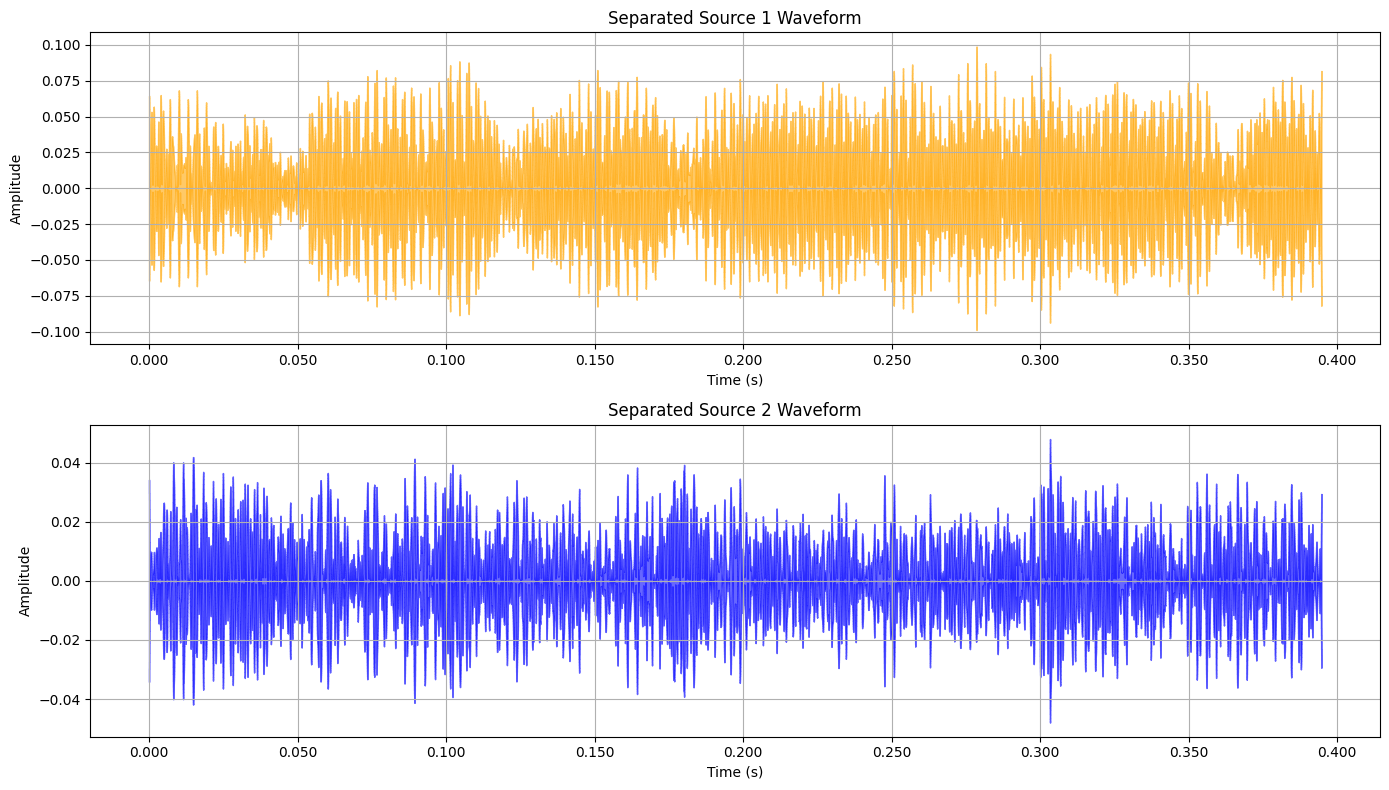

In [37]:
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display

# Load the audio file
audio_file = 'cut_audio_0_to_10s.wav'  # Replace with your audio file
y, sr = librosa.load(audio_file, sr=None)

# Perform NMF
D = librosa.stft(y)
D_magnitude, D_phase = np.abs(D), np.angle(D)

# Number of sources you want to extract
n_sources = 2  
W, H = librosa.decompose.decompose(D_magnitude, n_components=n_sources)

# Reconstruct the separated sources
source_1 = librosa.istft(W[:, 0][:, np.newaxis] * D_phase)
source_2 = librosa.istft(W[:, 1][:, np.newaxis] * D_phase)

# Save the separated sources
sf.write('source_1.wav', source_1, sr)  # First source
sf.write('source_2.wav', source_2, sr)  # Second source

# Visualizing the waveforms
plt.figure(figsize=(14, 8))

# Plot the first source
plt.subplot(2, 1, 1)
librosa.display.waveshow(source_1, sr=sr, alpha=0.6, color='orange')
plt.title("Separated Source 1 Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Plot the second source
plt.subplot(2, 1, 2)
librosa.display.waveshow(source_2, sr=sr, alpha=0.6, color='blue')
plt.title("Separated Source 2 Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import scipy.signal as signal

def plot_waveform(y, sr, title, color='blue', max_points=500000):
    """
    Plots the waveform of an audio signal.

    Parameters:
    - y: np.ndarray, audio time series
    - sr: int, sampling rate
    - title: str, title of the plot
    - color: str, color of the waveform
    - max_points: int, maximum number of points to plot to avoid MemoryError
    """
    total_points = len(y)
    if total_points > max_points:
        # Calculate the step size for downsampling
        step = total_points // max_points
        y_plot = y[::step]
        x_plot = np.linspace(0, len(y) / sr, len(y_plot))
    else:
        y_plot = y
        x_plot = np.linspace(0, len(y) / sr, len(y_plot))
    
    plt.plot(x_plot, y_plot, color=color, linewidth=0.5)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

# Load the original music file
original_music_path = 'cut_audio_0_to_10s.wav'  # Replace with your file path
print("Loading original music...")
y_music, sr_music = librosa.load(original_music_path, sr=None)
y_music = y_music.astype(np.float32)  # Ensure float32 for memory efficiency

# Bandpass filter to isolate vocals
lowcut = 100.0  # Lower frequency bound for vocals
highcut = 3000.0  # Upper frequency bound for vocals
print("Applying bandpass filter to isolate vocals...")
sos = signal.butter(10, [lowcut, highcut], btype='band', fs=sr_music, output='sos')
y_vocals = signal.sosfilt(sos, y_music)
y_vocals = y_vocals.astype(np.float32)  # Ensure float32 for memory efficiency

# Save the isolated vocals to a file
vocals_path = "output_vocals.wav"
print("Saving isolated vocals...")
sf.write(vocals_path, y_vocals, sr_music)

# Play the original music and extracted vocals
print("Playing original music...")
ipd.display(ipd.Audio(original_music_path))

print("Playing extracted vocals...")
ipd.display(ipd.Audio(vocals_path))

# Plotting the waveforms
print("Plotting waveforms...")
plt.figure(figsize=(14, 8))

# Plot original music waveform
plt.subplot(2, 1, 1)
plot_waveform(y_music, sr_music, "Original Music Waveform", color='blue')
        
# Plot extracted vocals waveform
plt.subplot(2, 1, 2)
plot_waveform(y_vocals, sr_music, "Extracted Vocals Waveform", color='orange')

plt.tight_layout()
plt.show()

print("Process completed successfully.")


Loading original music...
Applying bandpass filter to isolate vocals...
Saving isolated vocals...
Playing original music...


Playing extracted vocals...


Plotting waveforms...


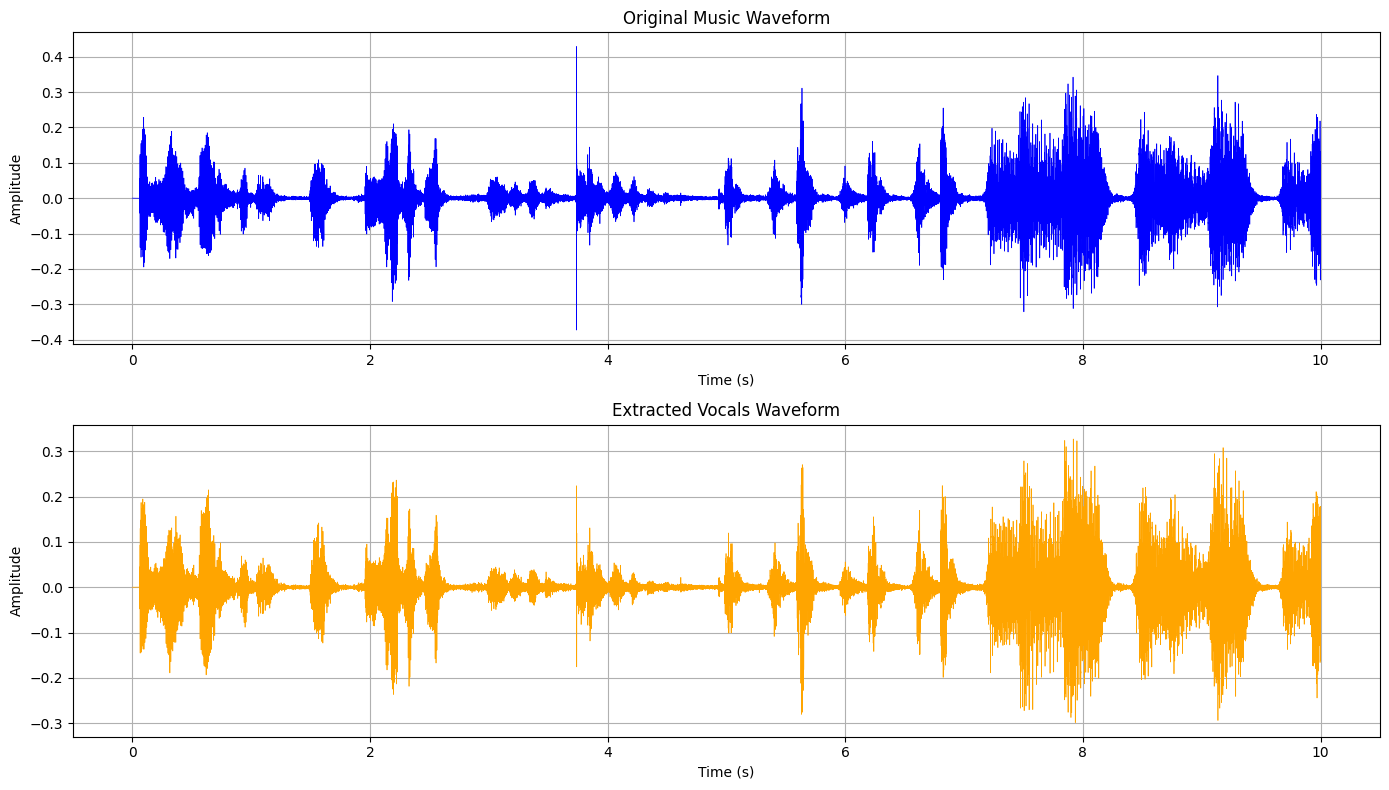

Process completed successfully.


In [16]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import scipy.signal as signal

def plot_waveform(y, sr, title, color='blue', max_points=500000):
    """
    Plots the waveform of an audio signal.

    Parameters:
    - y: np.ndarray, audio time series
    - sr: int, sampling rate
    - title: str, title of the plot
    - color: str, color of the waveform
    - max_points: int, maximum number of points to plot to avoid MemoryError
    """
    total_points = len(y)
    if total_points > max_points:
        # Calculate the step size for downsampling
        step = total_points // max_points
        y_plot = y[::step]
        x_plot = np.linspace(0, len(y) / sr, len(y_plot))
    else:
        y_plot = y
        x_plot = np.linspace(0, len(y) / sr, len(y_plot))
    
    plt.plot(x_plot, y_plot, color=color, linewidth=0.5)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

# Load the original music file
original_music_path = 'cut_audio_0_to_10s.wav'  # Replace with your file path
print("Loading original music...")
y_music, sr_music = librosa.load(original_music_path, sr=None)
y_music = y_music.astype(np.float32)  # Ensure float32 for memory efficiency

# Bandpass filter to isolate vocals
lowcut = 100.0  # Lower frequency bound for vocals
highcut = 3000.0  # Upper frequency bound for vocals
print("Applying bandpass filter to isolate vocals...")
sos = signal.butter(10, [lowcut, highcut], btype='band', fs=sr_music, output='sos')
y_vocals = signal.sosfilt(sos, y_music)
y_vocals = y_vocals.astype(np.float32)  # Ensure float32 for memory efficiency

# Save the isolated vocals to a file
vocals_path = "output_vocals.wav"
print("Saving isolated vocals...")
sf.write(vocals_path, y_vocals, sr_music)

# Play the original music and extracted vocals
print("Playing original music...")
ipd.display(ipd.Audio(original_music_path))

print("Playing extracted vocals...")
ipd.display(ipd.Audio(vocals_path))

# Plotting the waveforms
print("Plotting waveforms...")
plt.figure(figsize=(14, 8))

# Plot original music waveform
plt.subplot(2, 1, 1)
plot_waveform(y_music, sr_music, "Original Music Waveform", color='blue')
        
# Plot extracted vocals waveform
plt.subplot(2, 1, 2)
plot_waveform(y_vocals, sr_music, "Extracted Vocals Waveform", color='orange')

plt.tight_layout()
plt.show()

print("Process completed successfully.")


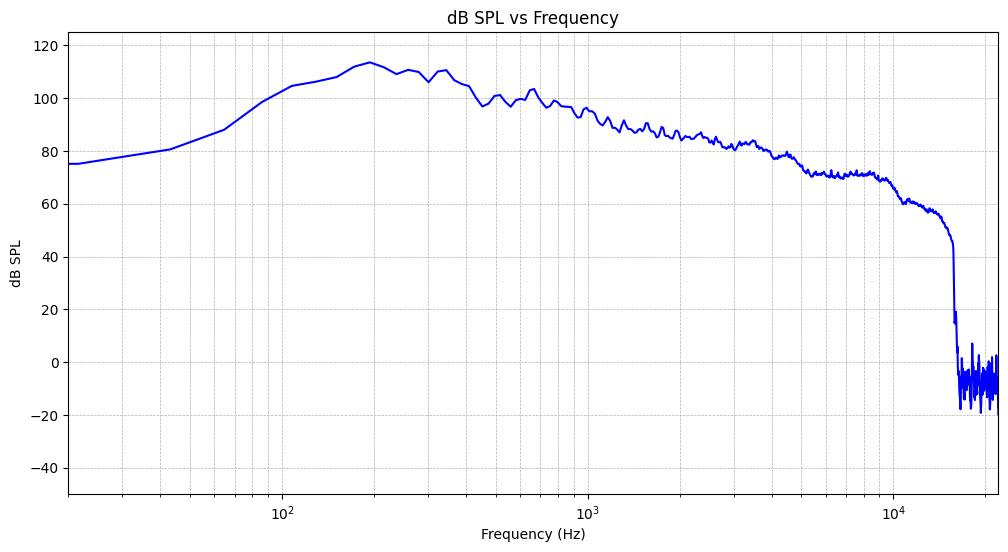

In [29]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file (replace 'your_audio_file.m4a' with your actual file path)
audio_file = "M1.mp3"
y, sr = librosa.load(audio_file, sr=None)

# Calculate the Short-Time Fourier Transform (STFT)
stft = librosa.stft(y)
magnitude = np.abs(stft)

# Convert to dB SPL
# Reference pressure in Pascals (20 µPa)
reference_pressure = 20e-6  
dB_SPL = 20 * np.log10(magnitude / reference_pressure)

# Calculate frequencies corresponding to the STFT bins
frequencies = librosa.fft_frequencies(sr=sr)

# Calculate the average dB SPL for each frequency bin
dB_SPL_mean = np.mean(dB_SPL, axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(frequencies, dB_SPL_mean, color='blue')
plt.title('dB SPL vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('dB SPL')
plt.xscale('log')  # Use logarithmic scale for frequency
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.xlim(20, sr / 2)  # Limit x-axis to human hearing range
plt.ylim(-50, 125)  # Limit y-axis for better visualization
plt.show()


In [28]:
frequencies

array([0.00000000e+00, 2.15332031e+01, 4.30664062e+01, ...,
       2.20069336e+04, 2.20284668e+04, 2.20500000e+04])

In [19]:
dB_SPL_mean

array([57.70173 , 56.459137, 57.293316, ..., 19.441505, 19.706306,
       17.088936], dtype=float32)

Loading original music...
Applying bandpass filter to isolate vocals...
Saving isolated vocals...
Playing original music...


Playing extracted vocals...


Plotting waveforms...


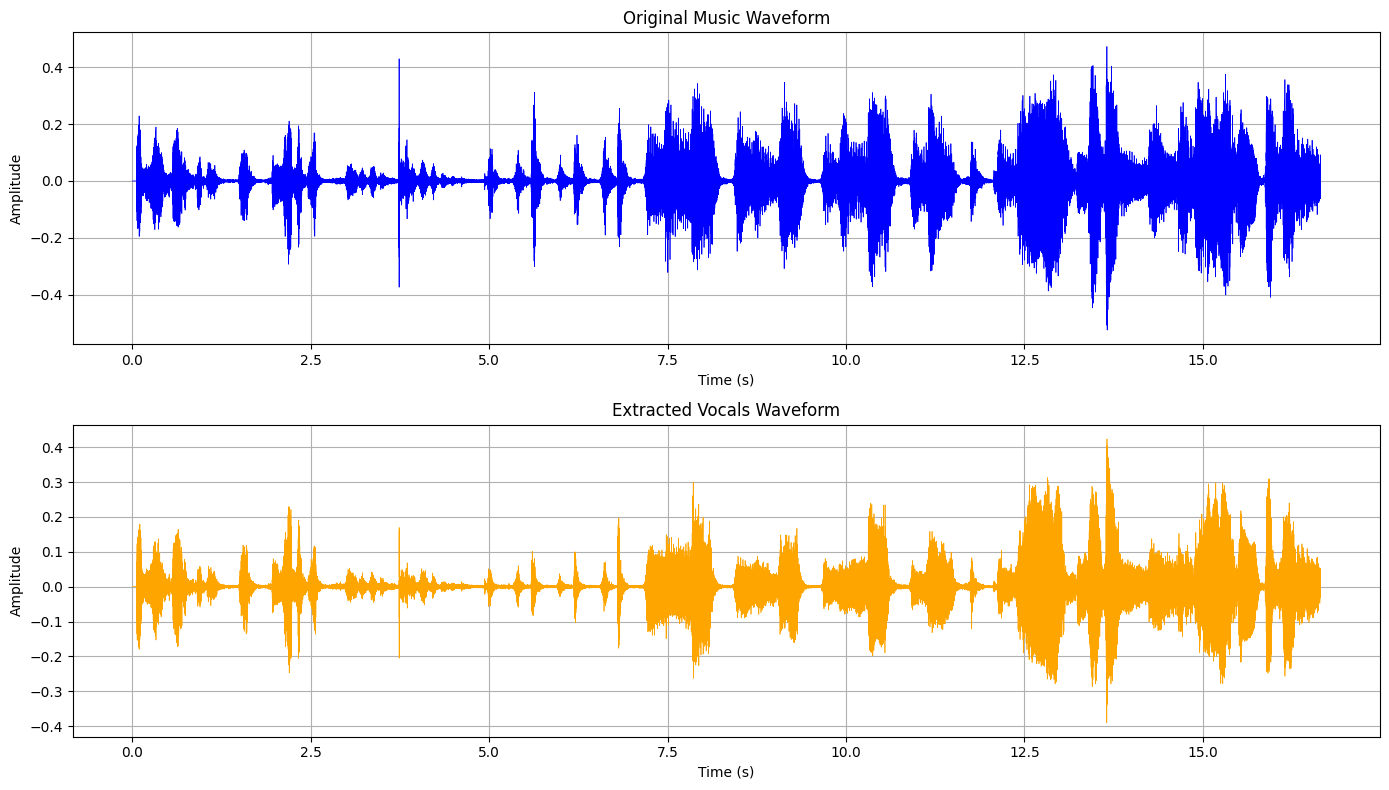

Process completed successfully.


In [31]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import scipy.signal as signal

def plot_waveform(y, sr, title, color='blue', max_points=500000):
    """
    Plots the waveform of an audio signal.

    Parameters:
    - y: np.ndarray, audio time series
    - sr: int, sampling rate
    - title: str, title of the plot
    - color: str, color of the waveform
    - max_points: int, maximum number of points to plot to avoid MemoryError
    """
    total_points = len(y)
    if total_points > max_points:
        # Calculate the step size for downsampling
        step = total_points // max_points
        y_plot = y[::step]
        x_plot = np.linspace(0, len(y) / sr, len(y_plot))
    else:
        y_plot = y
        x_plot = np.linspace(0, len(y) / sr, len(y_plot))
    
    plt.plot(x_plot, y_plot, color=color, linewidth=0.5)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

# Load the original music file
original_music_path = "C:\\Users\\MAY02\\Desktop\\Audio_Process\\output_segments\\segment_1.wav"  # Replace with your file path
print("Loading original music...")
y_music, sr_music = librosa.load(original_music_path, sr=None)
y_music = y_music.astype(np.float32)  # Ensure float32 for memory efficiency

# Bandpass filter to isolate vocals
lowcut =250.0  # Lower frequency bound for vocals
highcut = 3000.0  # Upper frequency bound for vocals
print("Applying bandpass filter to isolate vocals...")
sos = signal.butter(10, [lowcut, highcut], btype='band', fs=sr_music, output='sos')
y_vocals = signal.sosfilt(sos, y_music)
y_vocals = y_vocals.astype(np.float32)  # Ensure float32 for memory efficiency

# Save the isolated vocals to a file
vocals_path = "output_vocals.wav"
print("Saving isolated vocals...")
sf.write(vocals_path, y_vocals, sr_music)

# Play the original music and extracted vocals
print("Playing original music...")
ipd.display(ipd.Audio(original_music_path))

print("Playing extracted vocals...")
ipd.display(ipd.Audio(vocals_path))

# Plotting the waveforms
print("Plotting waveforms...")
plt.figure(figsize=(14, 8))

# Plot original music waveform
plt.subplot(2, 1, 1)
plot_waveform(y_music, sr_music, "Original Music Waveform", color='blue')
        
# Plot extracted vocals waveform
plt.subplot(2, 1, 2)
plot_waveform(y_vocals, sr_music, "Extracted Vocals Waveform", color='orange')

plt.tight_layout()
plt.show()

print("Process completed successfully.")


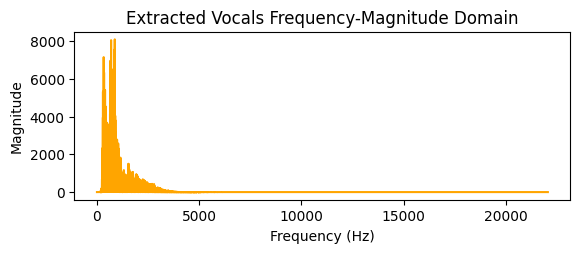

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Perform FFT to convert to frequency domain
fft_vocals = np.fft.fft(y_vocals)
frequencies = np.fft.fftfreq(len(fft_vocals), 1/sr_music)

# Get the magnitude of the frequencies
magnitude = np.abs(fft_vocals)

# Plot the frequency-magnitude domain
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2], color='orange')
plt.title("Extracted Vocals Frequency-Magnitude Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


Number of peaks detected: 260
Peak times (s): [9.83673469e-02 6.05646259e-01 2.19988662e+00 2.54891156e+00
 3.73993197e+00 6.81634921e+00 7.86492063e+00 9.23224490e+00
 1.05516327e+01 1.25176871e+01 1.28201134e+01 1.36532653e+01
 1.52847846e+01 1.59039229e+01 1.62140363e+01 1.75687302e+01
 1.78921995e+01 1.84405215e+01 1.88720862e+01 2.23204308e+01
 2.27156689e+01 2.31651701e+01 2.35701134e+01 2.48139229e+01
 2.54323129e+01 2.58071882e+01 2.61074603e+01 2.73532880e+01
 2.77409977e+01 2.81257823e+01 2.85766893e+01 2.89603175e+01
 2.92912245e+01 2.97744671e+01 3.12370522e+01 3.17402494e+01
 3.23352608e+01 3.26768934e+01 3.37259410e+01 3.42782766e+01
 3.46477778e+01 3.52197052e+01 3.71075057e+01 3.74815646e+01
 3.80094104e+01 3.83287075e+01 3.86655102e+01 3.96244671e+01
 4.02124943e+01 4.23507710e+01 4.26758050e+01 4.32762132e+01
 4.35791837e+01 4.41434014e+01 4.45154649e+01 4.48192971e+01
 4.53875283e+01 4.58175737e+01 4.61296145e+01 4.71024036e+01
 4.76800227e+01 4.80174150e+01 4.832882

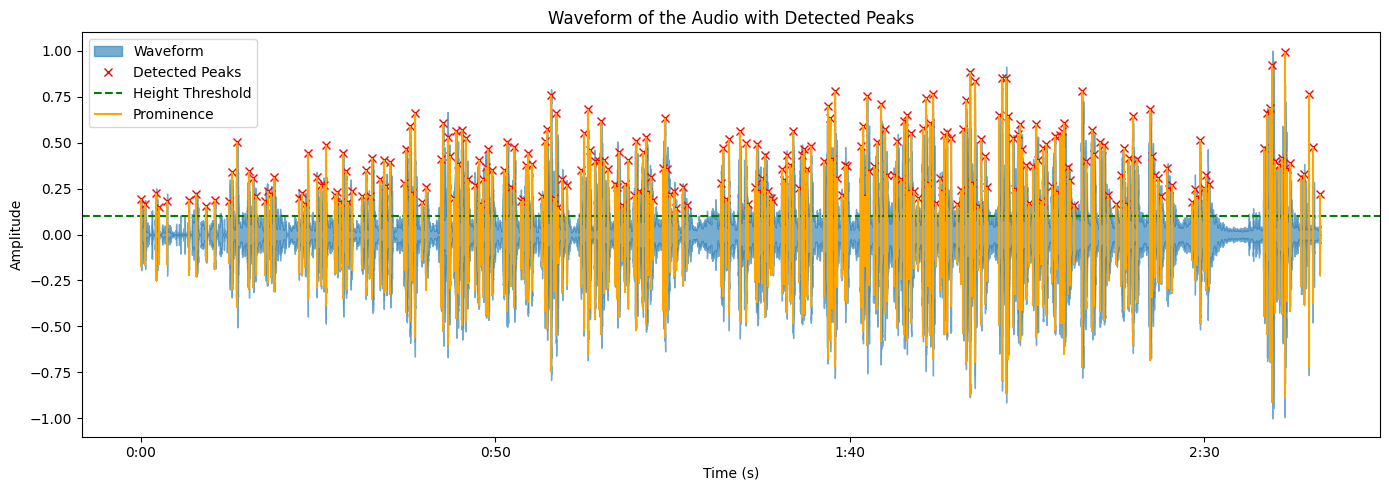

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the audio file (replace 'your_audio_file.wav' with the actual file path)
audio_file = "output_vocals.wav"
y, sr = librosa.load(audio_file, sr=None)

# Normalize the audio signal
y_norm = librosa.util.normalize(y)

# Peak detection parameters
peak_height = 0.1  # Adjust the height threshold
min_distance = int(0.3 * sr)  # Minimum distance between peaks (0.3 seconds here)
peak_prominence = 0.3  # Adjust prominence to detect smaller peaks

# Find peaks in the normalized audio signal
peaks, properties = find_peaks(y_norm, height=peak_height, distance=min_distance, prominence=peak_prominence)

# Debugging info: Print peak details
print(f"Number of peaks detected: {len(peaks)}")
print(f"Peak times (s): {peaks / sr}")
print(f"Prominences: {properties['prominences']}")

# Plotting the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_norm, sr=sr, alpha=0.6, label='Waveform')
plt.title("Waveform of the Audio with Detected Peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot detected peaks
plt.plot(peaks / sr, y_norm[peaks], 'rx', label='Detected Peaks')

# Plot the height threshold for visualization
plt.axhline(y=peak_height, color='green', linestyle='--', label='Height Threshold')

# Visualize the prominence of each peak
plt.vlines(peaks / sr, ymin=y_norm[peaks] - properties["prominences"],
           ymax=y_norm[peaks], color='orange', label='Prominence')

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import librosa
import sounddevice as sd
import numpy as np
from scipy.signal import find_peaks

# Load the audio file (replace 'your_audio_file.m4a' with your actual file path)
audio_file = "output_vocals.wav"
y, sr = librosa.load(audio_file, sr=None)

# Normalize the audio signal
y_norm = librosa.util.normalize(y)

# Peak detection parameters
peak_height = 0.1
min_distance = int(0.3 * sr)
peak_prominence = 0.3

# Find peaks in the normalized audio signal
peaks, properties = find_peaks(y_norm, height=peak_height, distance=min_distance, prominence=peak_prominence)

# Debugging info: Print peak details
print(f"Number of peaks detected: {len(peaks)}")
print(f"Peak times (s): {peaks / sr}")
print(f"Prominences: {properties['prominences']}")

# Duration of audio snippet to extract around each peak (in seconds)
snippet_duration = 0.5  # e.g., 200 milliseconds
snippet_samples = int(snippet_duration * sr)

# Collect snippets around each detected peak
snippets = []
for peak in peaks:
    start_sample = max(0, peak - snippet_samples // 2)  # Start the snippet slightly before the peak
    end_sample = min(len(y), start_sample + snippet_samples)  # End the snippet
    snippets.append(y[start_sample:end_sample])  # Collect the snippet

# Concatenate all snippets into a single audio track
assembled_song = np.concatenate(snippets)

# Function to play the assembled audio
def play_audio(y, sr):
    sd.play(y, sr)
    sd.wait()  # Wait until the audio finishes playing

# Play the assembled song
print("Playing the assembled song...")
play_audio(assembled_song, sr)


Number of peaks detected: 260
Peak times (s): [9.83673469e-02 6.05646259e-01 2.19988662e+00 2.54891156e+00
 3.73993197e+00 6.81634921e+00 7.86492063e+00 9.23224490e+00
 1.05516327e+01 1.25176871e+01 1.28201134e+01 1.36532653e+01
 1.52847846e+01 1.59039229e+01 1.62140363e+01 1.75687302e+01
 1.78921995e+01 1.84405215e+01 1.88720862e+01 2.23204308e+01
 2.27156689e+01 2.31651701e+01 2.35701134e+01 2.48139229e+01
 2.54323129e+01 2.58071882e+01 2.61074603e+01 2.73532880e+01
 2.77409977e+01 2.81257823e+01 2.85766893e+01 2.89603175e+01
 2.92912245e+01 2.97744671e+01 3.12370522e+01 3.17402494e+01
 3.23352608e+01 3.26768934e+01 3.37259410e+01 3.42782766e+01
 3.46477778e+01 3.52197052e+01 3.71075057e+01 3.74815646e+01
 3.80094104e+01 3.83287075e+01 3.86655102e+01 3.96244671e+01
 4.02124943e+01 4.23507710e+01 4.26758050e+01 4.32762132e+01
 4.35791837e+01 4.41434014e+01 4.45154649e+01 4.48192971e+01
 4.53875283e+01 4.58175737e+01 4.61296145e+01 4.71024036e+01
 4.76800227e+01 4.80174150e+01 4.832882